In [68]:
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline  
#shows plot right the below the code cell

from colossus.cosmology import cosmology 
cosmo = cosmology.setCosmology('planck18') # set cosmology to Planck 2018

import matplotlib 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'
matplotlib.rcParams['font.size'] = 16

from galpy.potential import MiyamotoNagaiPotential, PlummerPotential #using galpy for potential descirbing the baryonic profile

from matplotlib import interactive
interactive(True)

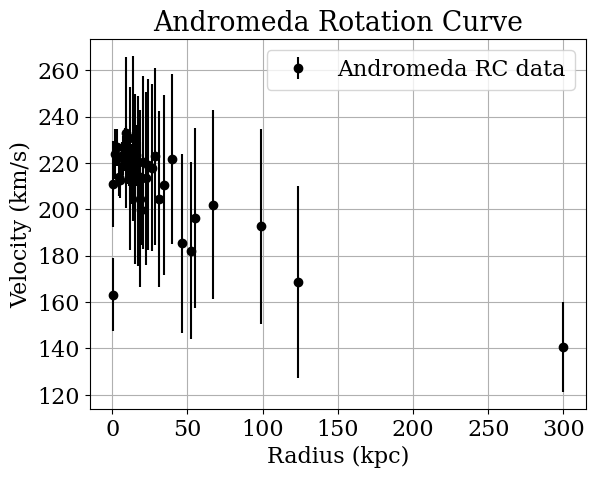

In [69]:
# Loading the andromeda rc data 
andro_data = np.loadtxt(r'C:\Amogh\Research\TIFR Project\MW_splashback\data files\andromeda_rc-data.txt')
r = andro_data[:,0] # in kpc
v = andro_data[:,1] # in km/s
v_err = andro_data[:,2] # in km/s

# plotting the data
plt.errorbar(r, v, yerr=v_err, fmt='o', color='black', label='Andromeda RC data')
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
#plt.xscale('log')
plt.title('Andromeda Rotation Curve')
plt.legend()
plt.grid()
plt.show()

In [70]:
# adding aditional data point at 300kpc
r_value = 300 # in kpc
G = 4.302*1.0e-6 # (kpc/Msun) (km/s)^2
M = 1.38e12 # mass of the galaxy in Msun
M_error = 0.38e12 # error in mass of the galaxy in Msun
v_mass = np.sqrt(G*M/r_value) # velocity in km/s
v_err_mass = 0.5*v_mass*(M_error/M) # error in velocity

print('Velocity:', v_mass)
print('Velocity error:', v_err_mass)

Velocity: 140.67409143122268
Velocity error: 19.3681720086466


Degree 1: Validation MSE = 144.554, Validation R-squared = 0.285
Degree 2: Validation MSE = 86.325, Validation R-squared = 0.573
Degree 3: Validation MSE = 85.360, Validation R-squared = 0.578
Degree 4: Validation MSE = 108.132, Validation R-squared = 0.465
Degree 5: Validation MSE = 106.254, Validation R-squared = 0.475


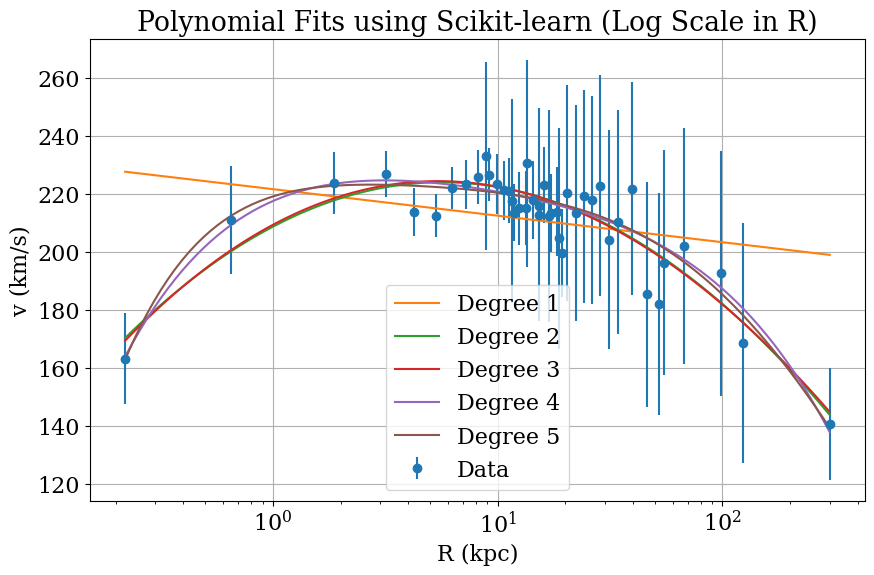

In [71]:
log_r = np.log(r)

degrees_to_try = range(1, 6)  # Try degrees 1 to 5
results = {}

X = log_r.reshape(-1, 1)
y = v

# Split data for cross-validation (optional but recommended)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
plt.errorbar(r, v, yerr=v_err, fmt='o', label='Data')

for degree in degrees_to_try:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_poly_val)
    mse = mean_squared_error(y_val, y_pred_val)
    r2 = r2_score(y_val, y_pred_val)

    # Store results
    results[degree] = {'model': model, 'mse': mse, 'r2': r2, 'coefficients': model.coef_, 'intercept': model.intercept_}
    print(f"Degree {degree}: Validation MSE = {mse:.3f}, Validation R-squared = {r2:.3f}")

    # Generate points for the fitted curve for plotting
    log_r_fit = np.linspace(np.min(log_r), np.max(log_r), 100).reshape(-1, 1)
    X_poly_fit = poly.transform(log_r_fit)
    v_fit = model.predict(X_poly_fit)
    r_fit = np.exp(log_r_fit)
    plt.plot(r_fit, v_fit, label=f'Degree {degree}')

plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.xscale('log')
plt.legend()
plt.title('Polynomial Fits using Scikit-learn (Log Scale in R)')
plt.grid(True)
plt.show()

# After running, analyze the validation metrics (MSE and R-squared) for each degree
# to help you choose the optimal degree. Lower MSE and higher R-squared on the
# validation set generally indicate a better model that generalizes well to unseen data.

Coefficients (in order of increasing power of log(r)): [ 0.         17.94730666 -5.66458198  0.09112832]
Intercept: 209.35330023859038


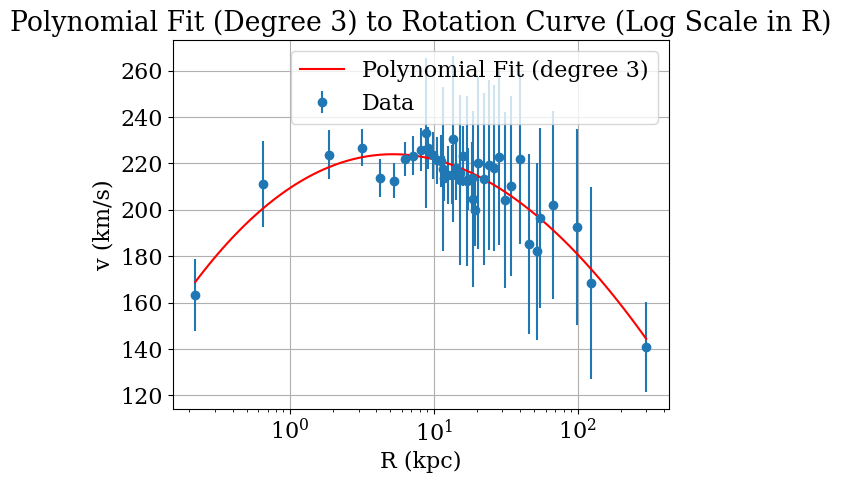


Algebraic Expression for v vs r:
v(r) = 209.3533 + 17.9473 * log(r) + -5.6646 * (log(r))^2 + 0.0911 * (log(r))^3


In [72]:
# Using a degree 3 polynomial for the final fit
log_r = np.log(r)
degree = 3

X = log_r.reshape(-1, 1)
y = v

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Get the coefficients of the fit
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (in order of increasing power of log(r)):", coefficients)
print("Intercept:", intercept)

# Generate points for the fitted curve
log_r_fit = np.linspace(np.min(log_r), np.max(log_r), 100).reshape(-1, 1)
X_poly_fit = poly.transform(log_r_fit)
v_fit = model.predict(X_poly_fit)
r_fit = np.exp(log_r_fit)

# Plot the data and the fit
plt.errorbar(r, v, yerr=v_err, fmt='o', label='Data')
plt.plot(r_fit, v_fit, 'r-', label=f'Polynomial Fit (degree {degree})')
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.xscale('log')
plt.legend()
plt.title('Polynomial Fit (Degree 3) to Rotation Curve (Log Scale in R)')
plt.grid(True)
plt.show()

# Algebraic Expression for v vs r

# The fit is of the form: v = c0 + c1*log(r) + c2*(log(r))^2 + c3*(log(r))^3

c0 = intercept
c1 = coefficients[1]
c2 = coefficients[2]
c3 = coefficients[3]

print("\nAlgebraic Expression for v vs r:")
print(f"v(r) = {c0:.4f} + {c1:.4f} * log(r) + {c2:.4f} * (log(r))^2 + {c3:.4f} * (log(r))^3")

In [73]:
# Also we have baryonic contribution to the rotation curve
G = 4.302*1.0e-6 # (kpc/Msun) (km/s)^2
def Vbary(r):
    mp_thin = MiyamotoNagaiPotential(amp=G*2.32*1e7*1700.0, a=5.3, b=0.25, normalize=False)
    mp_thick = MiyamotoNagaiPotential(amp=G*2.32*1e7*1700.0, a=2.6, b=0.8, normalize=False)
    pl_bulge = PlummerPotential(amp=G*2.32*1e7*460., b=0.3, normalize=False)
    
    return np.sqrt(mp_thin.vcirc(r)**2 + mp_thick.vcirc(r)**2 + pl_bulge.vcirc(r)**2)

### Now we know the contribution of andromeda galaxy, we shall subtract this contribution from our original data to get the RC for milky way

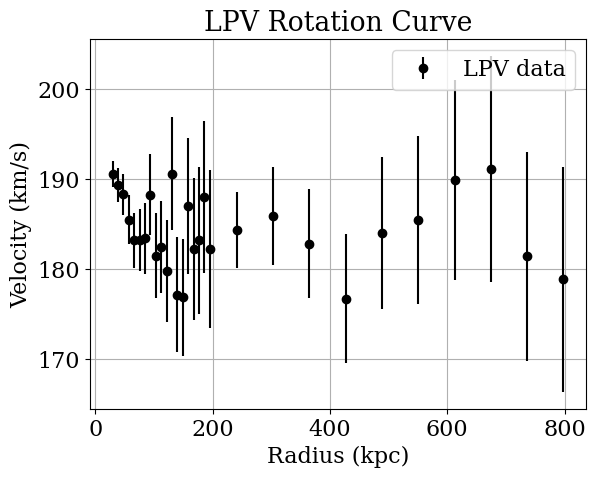

In [ ]:
# Extracting the LPV data from 25 kpc to 800 kpc
data = np.loadtxt(r'C:\Amogh\Research\TIFR Project\MW_splashback\data files\lpv_mpc_with_eilers_till_1200kpc.txt', unpack=True)
# Extract the columns
r_lpv = data[:, 0]  # in kpc
v_lpv = data[:, 1]  # in km/s
v_lpv_err = data[:, 2]  # in km/s

radial_condition = (25 <= data[0]) & (data[0] <= 800) # kpc

r_lpv = data[0][radial_condition]
v_lpv = data[1][radial_condition]
v_lpv_err = data[2][radial_condition]

M_tot = (v_lpv**2 * r_lpv/G)
M_tot_err = 2*M_tot*(v_lpv_err/v_lpv)

# plotting the data
plt.errorbar(r_lpv, v_lpv, yerr=v_lpv_err, fmt='o', color='black', label='LPV data')
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('LPV Rotation Curve')
plt.legend()
plt.grid()
plt.show()


In [75]:
# Define a function to get v at a given r
def v_andromeda(r_value):
    log_r_value = np.log(r_value)
    v_calculated = c0 + c1 * log_r_value + c2 * (log_r_value)**2 + c3 * (log_r_value)**3
    return v_calculated

In [76]:
print(r_lpv)
print(v_lpv)

[ 29.60526316  38.81578947  48.02631579  57.23684211  66.44736842
  75.65789474  84.86842105  94.07894737 103.28947368 112.5
 121.71052632 130.92105263 140.13157895 149.34210526 158.55263158
 167.76315789 176.97368421 186.18421053 195.39473684 241.44736842
 303.28947368 365.13157895 426.97368421 488.81578947 550.65789474
 612.5        674.34210526 736.18421053 798.02631579]
[190.5956495  189.35667491 188.3404992  185.51528991 183.19100586
 183.19728938 183.44795672 188.29072523 181.46533462 182.45903735
 179.79015839 190.60101618 177.16094238 176.87804066 187.01102498
 182.25483669 183.22569559 188.01663883 182.20863729 184.32333346
 185.94039361 182.82916475 176.7267659  184.05009034 185.4564153
 189.95979636 191.16762278 181.43124372 178.85589863]


In [77]:
v_andromeda_values = v_andromeda(800 - r_lpv)
# print(v_andromeda_values)
print(v_lpv - v_andromeda_values)

[ 85.45549141  83.67248577  82.10679042  78.72645267  75.84130702
  75.28086718  74.95881628  79.22273381  71.81221667  72.21436933
  68.9473633   79.15335786  65.10151944  64.19978019  73.70667583
  68.31696249  68.64666734  72.78862703  66.32360376  65.02467459
  61.67673307  53.07156665  40.80700696  41.0941745   34.2660183
  28.77628847  17.11744166 -11.21202407 -40.10990431]


C:\Users\sriva\AppData\Local\Temp\ipykernel_13404\852842247.py:15: RuntimeWarning: divide by zero encountered in divide
  M_err_mw = M_mw * (2 * v_mw_err/v_mw) #Msun

C:\Users\sriva\AppData\Local\Temp\ipykernel_13404\852842247.py:15: RuntimeWarning: invalid value encountered in multiply
  M_err_mw = M_mw * (2 * v_mw_err/v_mw) #Msun

C:\Users\sriva\AppData\Local\Temp\ipykernel_13404\852842247.py:26: RuntimeWarning: divide by zero encountered in divide
  M_err_dm = M_dm * (2 * v_mw_dm_err/v_mw_dm) #Msun

C:\Users\sriva\AppData\Local\Temp\ipykernel_13404\852842247.py:26: RuntimeWarning: invalid value encountered in multiply
  M_err_dm = M_dm * (2 * v_mw_dm_err/v_mw_dm) #Msun



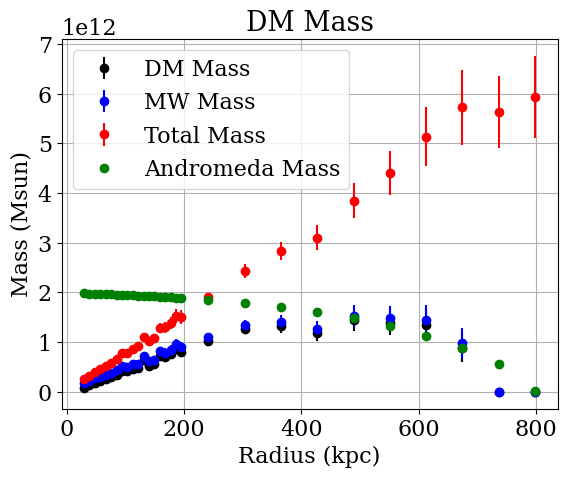

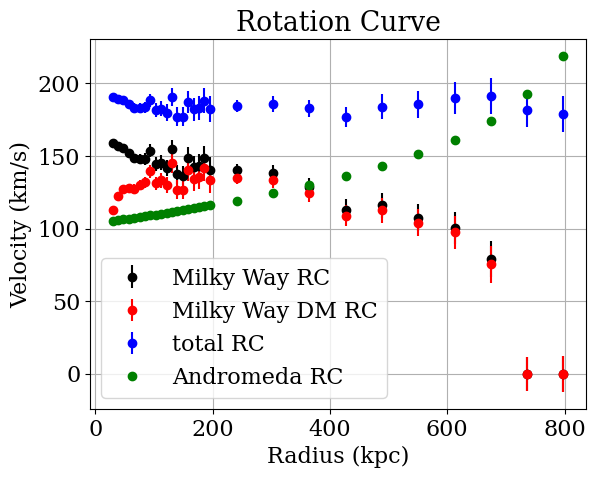

In [78]:
# Now we remove the andromeda contribution
# assume the distance to Andromeda is 800 kpc

r_andro = 800 - r_lpv
v_andro = v_andromeda(r_andro)

M_andro = (v_andro**2 * r_andro/G) # Msun

# Ensure v_mw is real by setting negative sqrt arguments to zero
v_mw_squared = v_lpv**2 - v_andro**2
v_mw = np.sqrt(np.maximum(0, v_mw_squared))
v_mw_err = v_lpv_err #same error as LPV data

M_mw = (v_mw**2 * r_lpv) / G # Msun
M_err_mw = M_mw * (2 * v_mw_err/v_mw) #Msun


# now removing the baryonic contribution
v_mw_bary = Vbary(r_lpv)
v_mw_dm_squared = (v_mw**2 - v_mw_bary**2)
v_mw_dm = np.sqrt(np.maximum(0, v_mw_dm_squared))
v_mw_dm_err = v_mw_err #same error as LPV data

#Calculating the mass of the DM halo
M_dm = (v_mw_dm**2 * r_lpv) / G # Msun
M_err_dm = M_dm * (2 * v_mw_dm_err/v_mw_dm) #Msun

# plotting the mass data
plt.errorbar(r_lpv, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM Mass')
plt.errorbar(r_lpv, M_mw, yerr=M_err_mw, fmt='o', color='blue', label='MW Mass')
plt.errorbar(r_lpv, M_tot, yerr=M_tot_err, fmt='o', color='red', label='Total Mass')
plt.errorbar(r_lpv, M_andro, fmt='o', color='green', label='Andromeda Mass')
plt.xlabel('Radius (kpc)')
plt.ylabel('Mass (Msun)')
plt.title('DM Mass')
plt.legend()
plt.grid()
plt.show()

# plotting the RC
plt.errorbar(r_lpv, v_mw, yerr=v_mw_err, fmt='o', color='black', label='Milky Way RC')
plt.errorbar(r_lpv, v_mw_dm, yerr=v_mw_dm_err, fmt='o', color='red', label='Milky Way DM RC')
plt.errorbar(r_lpv, v_lpv, yerr=v_lpv_err, fmt='o', color='blue', label='total RC')
plt.errorbar(r_lpv, v_andro, fmt='o', color='green', label='Andromeda RC')
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Rotation Curve')
plt.legend()
plt.grid()
plt.show()




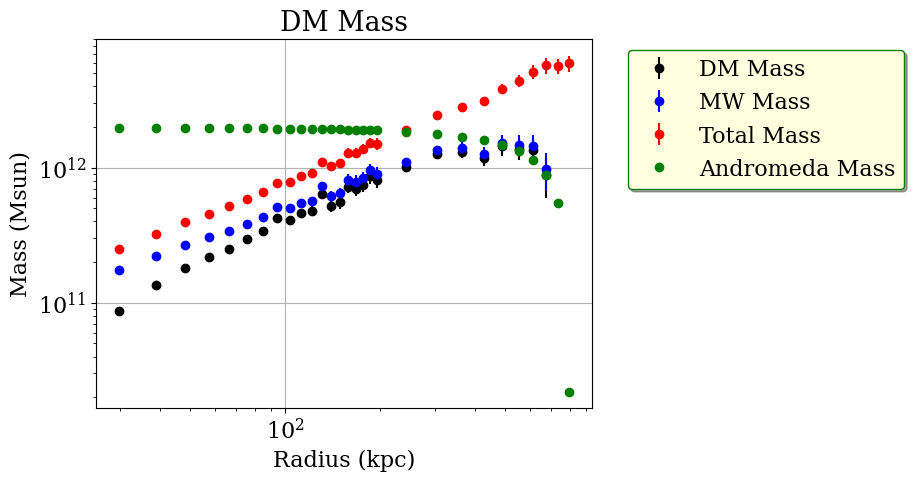

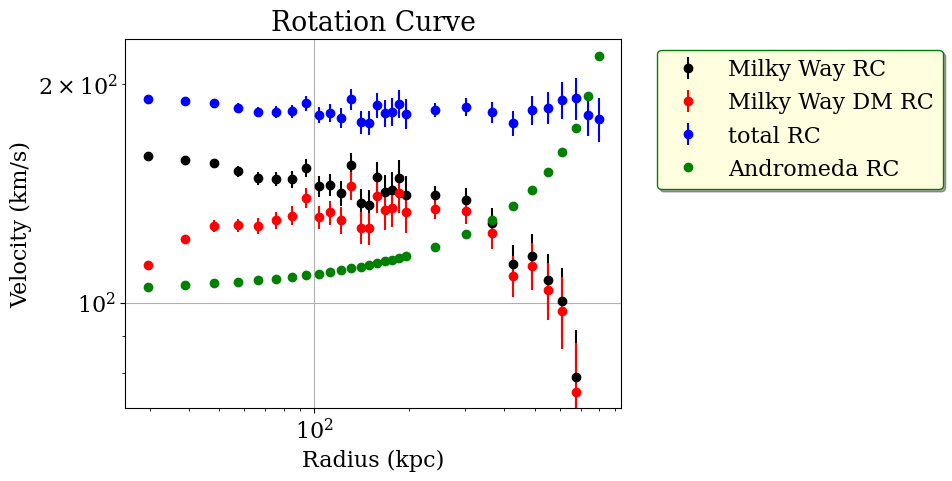

In [110]:

# plotting the mass data
plt.errorbar(r_lpv, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM Mass')
plt.errorbar(r_lpv, M_mw, yerr=M_err_mw, fmt='o', color='blue', label='MW Mass')
plt.errorbar(r_lpv, M_tot, yerr=M_tot_err, fmt='o', color='red', label='Total Mass')
plt.errorbar(r_lpv, M_andro, fmt='o', color='green', label='Andromeda Mass')
plt.xlabel('Radius (kpc)')
plt.ylabel('Mass (Msun)')
plt.title('DM Mass')
plt.loglog()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True)
plt.grid()
plt.show()

# plotting the RC
plt.errorbar(r_lpv, v_mw, yerr=v_mw_err, fmt='o', color='black', label='Milky Way RC')
plt.errorbar(r_lpv, v_mw_dm, yerr=v_mw_dm_err, fmt='o', color='red', label='Milky Way DM RC')
plt.errorbar(r_lpv, v_lpv, yerr=v_lpv_err, fmt='o', color='blue', label='total RC')
plt.errorbar(r_lpv, v_andro, fmt='o', color='green', label='Andromeda RC')
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Rotation Curve')
plt.loglog()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True)
plt.grid()
plt.show()


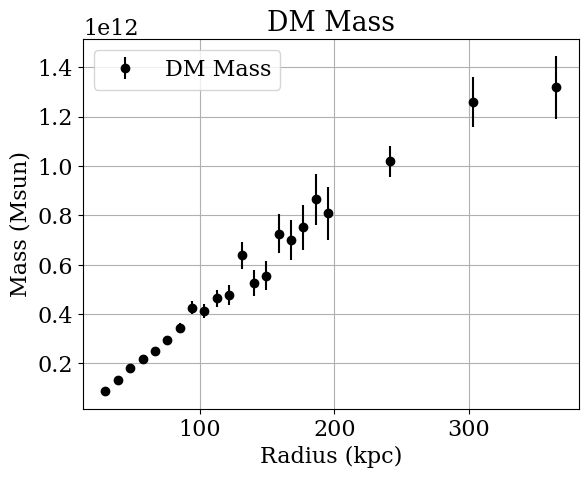

[8.71257716e+10 1.34820221e+11 1.81532094e+11 2.17374821e+11
 2.51357493e+11 2.96300874e+11 3.42500254e+11 4.25902646e+11
 4.12624559e+11 4.63402262e+11 4.77534923e+11 6.38181746e+11
 5.23893342e+11 5.55885175e+11 7.26354646e+11 6.99631652e+11
 7.51515068e+11 8.65796824e+11 8.08486724e+11 1.01855152e+12
 1.25930074e+12 1.31849542e+12]
[2.21620764e+09 4.09889316e+09 6.52429756e+09 9.13499542e+09
 1.21321290e+10 1.57975948e+10 2.05606187e+10 2.73127787e+10
 2.97494938e+10 3.55731898e+10 4.15871318e+10 5.54315987e+10
 5.26874803e+10 5.73561760e+10 7.84246674e+10 8.21198322e+10
 9.08897655e+10 1.03514059e+11 1.06344416e+11 6.40487747e+10
 1.02320246e+11 1.27926534e+11]


In [79]:
# Now restricting our data till 400 kpc
M_dm_restricted = M_dm[r_lpv < 400]
M_err_dm_restricted = M_err_dm[r_lpv < 400]
r_lpv_restricted = r_lpv[r_lpv < 400]

M_dm_restricted.shape
M_err_dm_restricted.shape

# plotting the data
plt.errorbar(r_lpv_restricted, M_dm_restricted, yerr=M_err_dm_restricted, fmt='o', color='black', label='DM Mass')
plt.xlabel('Radius (kpc)')
plt.ylabel('Mass (Msun)')
plt.title('DM Mass')
plt.legend()
plt.grid()
plt.show()

print(M_dm_restricted)
print(M_err_dm_restricted)

In [88]:
h = 0.6766 # Hubble constant
from colossus.halo import profile_nfw
# NFW Profile
#intial guess for the parameters
rhos = 6378795.928070417
rs = 20.311309856581044

pnfw = profile_nfw.NFWProfile(rhos = rhos, rs = rs, mdef='200m')
pnfw_fit = pnfw.fit(r_lpv_restricted/h, M_dm_restricted/h, 'M', q_err=M_err_dm_restricted/h, method='leastsq')
pnfw.update()
M_dm_fit_nfw = pnfw_fit['q_fit']*h # Msun
print ('NFW best fit R200:', pnfw.RDelta(z=0.0, mdef='200m'))

-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Could not find analytical derivative function for quantity M.
Found solution in 6 steps. Best-fit parameters:
Parameter       rhos = 2.31e+05 [2.12e+05 .. 2.52e+05]
Parameter         rs = 8.26e+01 [7.87e+01 .. 8.67e+01]
chi2 / Ndof = 18.5 / 20 = 0.93
-------------------------------------------------------------------------------------
NFW best fit R200: 241.52724812505954


In [102]:
#Calculating the local DM density at sun using the best fit parameters
R_sun = 8.2 # kpc
rhos_fit = pnfw_fit['x'][0]
rs_fit = pnfw_fit['x'][1]
rho_at_sun = pnfw.density(R_sun/h)/h**2 # Msun kpc^-3

#convert from Msun kpc^-3 to GeV cm^-3
GeVcm3_to_Msunkpc3 = 2.685e7  # GeV/cm^3 to M_sun/kpc^3
Msun_kpc3_to_GeVcm3 = 1.0 / GeVcm3_to_Msunkpc3
rho_at_sun = rho_at_sun * Msun_kpc3_to_GeVcm3 # GeV cm^-3
print ('NFW density at sun:', rho_at_sun, 'GeV cm^-3')
print ('NFW best fit parameters:', pnfw_fit['x'])

NFW density at sun: 0.09753475189906956 GeV cm^-3
NFW best fit parameters: [2.31200899e+05 8.26299801e+01]


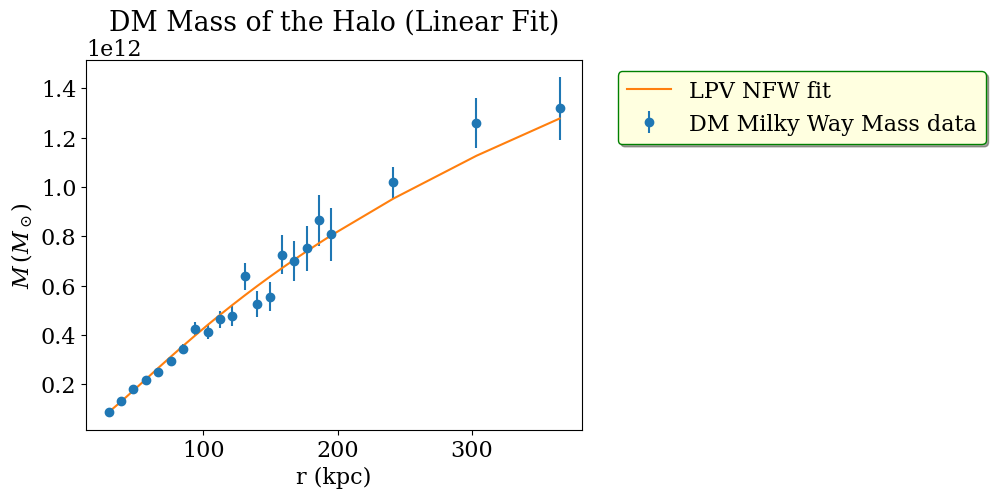

In [120]:
plt.figure()
plt.errorbar(r_lpv_restricted, M_dm_restricted, yerr=M_err_dm_restricted, fmt='o', label='DM Milky Way Mass data')
plt.plot(r_lpv_restricted, M_dm_fit_nfw, '-', label='LPV NFW fit')
plt.xlabel('r (kpc)')
plt.ylabel(r'$M \, (M_\odot)$')
plt.title('DM Mass of the Halo (Linear Fit)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True)
plt.show()

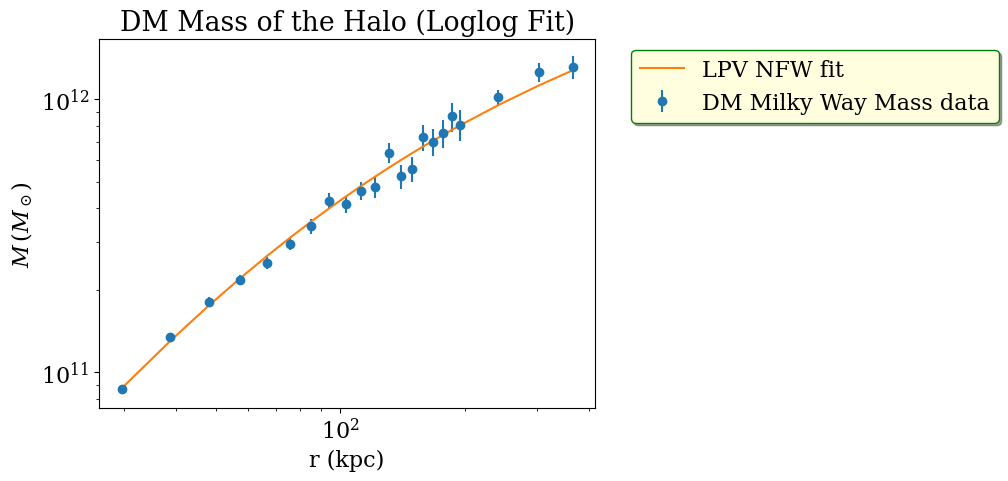

In [119]:
plt.figure()
plt.errorbar(r_lpv_restricted, M_dm_restricted, yerr=M_err_dm_restricted, fmt='o', label='DM Milky Way Mass data')
plt.plot(r_lpv_restricted, M_dm_fit_nfw, '-', label='LPV NFW fit')
plt.xlabel('r (kpc)')
plt.ylabel(r'$M \, (M_\odot)$')
plt.title('DM Mass of the Halo (Loglog Fit)')
plt.loglog()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True)
plt.show()

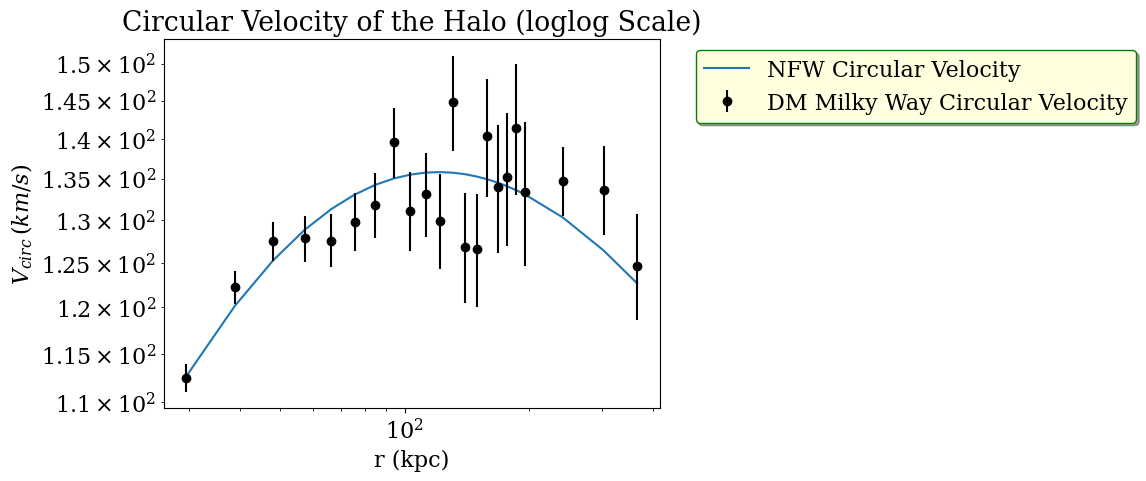

In [118]:
# obtain the circular velocity and plot it
v_mw_dm_restricted = v_mw_dm[r_lpv < 400]
v_mw_dm_err_restricted = v_mw_dm_err[r_lpv < 400]
r_lpv_restricted = r_lpv[r_lpv < 400]

v_circ = pnfw.circularVelocity(r_lpv_restricted/h) # km/s
plt.figure()
plt.plot(r_lpv_restricted, v_circ, label='NFW Circular Velocity')
plt.errorbar(r_lpv_restricted, v_mw_dm_restricted, yerr=v_mw_dm_err_restricted, fmt='o', color='black', label='DM Milky Way Circular Velocity')
plt.xlabel('r (kpc)')
plt.loglog()
plt.ylabel(r'$V_{circ} \, (km/s)$')
plt.title('Circular Velocity of the Halo (loglog Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);

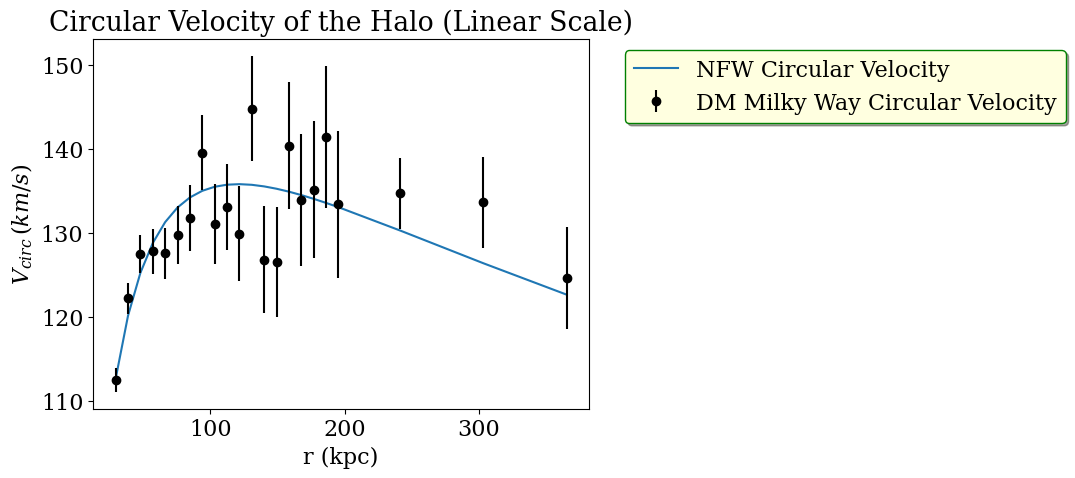

In [117]:
# obtain the circular velocity and plot it
v_mw_dm_restricted = v_mw_dm[r_lpv < 400]
v_mw_dm_err_restricted = v_mw_dm_err[r_lpv < 400]
r_lpv_restricted = r_lpv[r_lpv < 400]

v_circ = pnfw.circularVelocity(r_lpv_restricted/h) # km/s
plt.figure()
plt.plot(r_lpv_restricted, v_circ, label='NFW Circular Velocity')
plt.errorbar(r_lpv_restricted, v_mw_dm_restricted, yerr=v_mw_dm_err_restricted, fmt='o', color='black', label='DM Milky Way Circular Velocity')
plt.xlabel('r (kpc)')
plt.ylabel(r'$V_{circ} \, (km/s)$')
plt.title('Circular Velocity of the Halo (Linear Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);

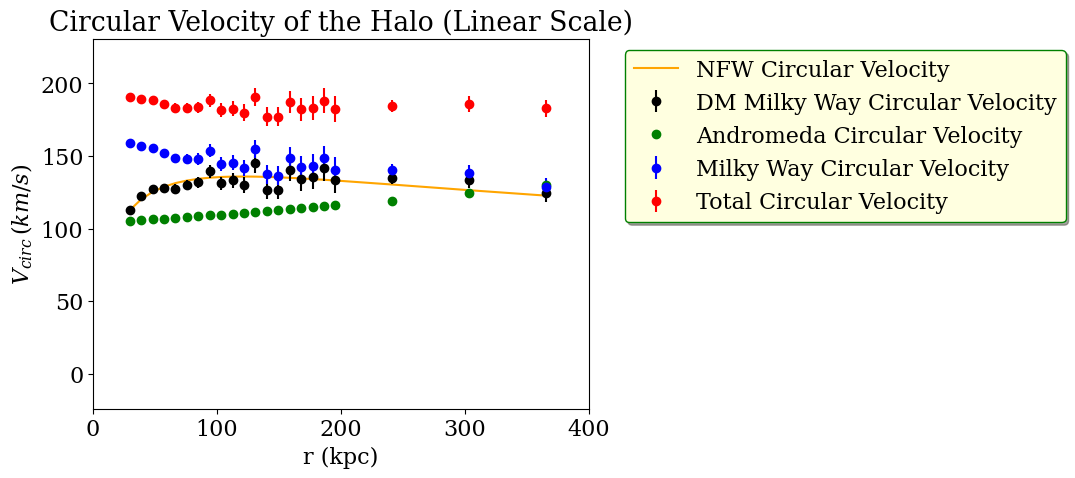

In [116]:
# obtain the circular velocity and plot it
v_mw_dm_restricted = v_mw_dm[r_lpv < 400]
v_mw_dm_err_restricted = v_mw_dm_err[r_lpv < 400]
r_lpv_restricted = r_lpv[r_lpv < 400]

v_circ = pnfw.circularVelocity(r_lpv_restricted/h) # km/s
plt.figure()
plt.plot(r_lpv_restricted, v_circ, label='NFW Circular Velocity', color='orange')
plt.errorbar(r_lpv_restricted, v_mw_dm_restricted, yerr=v_mw_dm_err_restricted, fmt='o', color='black', label='DM Milky Way Circular Velocity')
plt.errorbar(r_lpv, v_andro, fmt='o', color='green', label='Andromeda Circular Velocity')
plt.errorbar(r_lpv, v_mw, yerr=v_mw_err, fmt='o', color='blue', label='Milky Way Circular Velocity')
plt.errorbar(r_lpv, v_lpv, yerr=v_lpv_err, fmt='o', color='red', label='Total Circular Velocity')
plt.xlabel('r (kpc)')
plt.xlim(0, 400)
plt.ylabel(r'$V_{circ} \, (km/s)$')
plt.title('Circular Velocity of the Halo (Linear Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);

C:\Users\sriva\AppData\Local\Temp\ipykernel_13404\185679586.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 400)



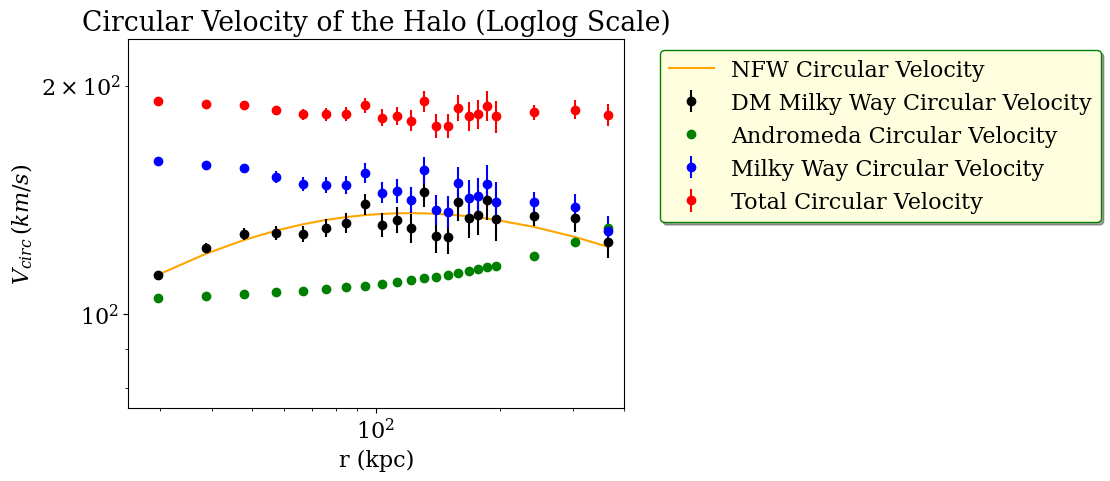

In [124]:
# obtain the circular velocity and plot it
v_mw_dm_restricted = v_mw_dm[r_lpv < 400]
v_mw_dm_err_restricted = v_mw_dm_err[r_lpv < 400]
r_lpv_restricted = r_lpv[r_lpv < 400]

v_circ = pnfw.circularVelocity(r_lpv_restricted/h) # km/s
plt.figure()
plt.plot(r_lpv_restricted, v_circ, label='NFW Circular Velocity', color='orange')
plt.errorbar(r_lpv_restricted, v_mw_dm_restricted, yerr=v_mw_dm_err_restricted, fmt='o', color='black', label='DM Milky Way Circular Velocity')
plt.errorbar(r_lpv, v_andro, fmt='o', color='green', label='Andromeda Circular Velocity')
plt.errorbar(r_lpv, v_mw, yerr=v_mw_err, fmt='o', color='blue', label='Milky Way Circular Velocity')
plt.errorbar(r_lpv, v_lpv, yerr=v_lpv_err, fmt='o', color='red', label='Total Circular Velocity')
plt.xlabel('r (kpc)')
plt.loglog()
plt.xlim(0, 400)
plt.ylabel(r'$V_{circ} \, (km/s)$')
plt.title('Circular Velocity of the Halo (Loglog Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);

In [126]:
from colossus.halo import profile_diemer23
# D23 Profile
#intial guess for the parameters

rhos = 6378795.928070417
rs = 20.311309856581044
rt = 303.91481493355593
alpha = 0.18
beta = 3.0

pd23 = profile_diemer23.ModelAProfile(rhos = rhos, rs = rs, rt = rt, alpha = alpha, beta = beta, mdef='200m')
pd23_fit = pd23.fit(r_lpv_restricted/h, M_dm_restricted/h, 'M', q_err=M_err_dm_restricted/h, method='leastsq')
pd23.update()
M_dm_fit_d23 = pd23_fit['q_fit']*h # Msun
print ('D23 best fit R200:', pd23.RDelta(z=0.0, mdef='200m'))

-------------------------------------------------------------------------------------
Profile fit: Varying 5 / 5 parameters.
Could not find analytical derivative function for quantity M.
c:\Users\sriva\OneDrive\Documents\Python\Python312\Lib\site-packages\colossus\halo\profile_diemer23.py:395: RuntimeWarning: overflow encountered in scalar power
  S = -2.0 / alpha * ((r / rs)**alpha - 1.0) - 1.0 / beta * ((r / rt)**beta - (rs / rt)**beta)

c:\Users\sriva\OneDrive\Documents\Python\Python312\Lib\site-packages\colossus\halo\profile_diemer23.py:395: RuntimeWarning: invalid value encountered in scalar subtract
  S = -2.0 / alpha * ((r / rs)**alpha - 1.0) - 1.0 / beta * ((r / rt)**beta - (rs / rt)**beta)

c:\Users\sriva\OneDrive\Documents\Python\Python312\Lib\site-packages\colossus\halo\profile_base.py:799: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  M[i], _ = scipy.int

In [127]:
# calculating the local DM density at sun using the best fit parameters
R_sun = 8.2 # kpc
rhos_fit = pd23_fit['x'][0]
rs_fit = pd23_fit['x'][1]
rt_fit = pd23_fit['x'][2]
alpha_fit = pd23_fit['x'][3]
beta_fit = pd23_fit['x'][4]
rho_at_sun = pd23.density(R_sun/h)/h**2 # Msun kpc^-3
#convert from Msun kpc^-3 to GeV cm^-3
GeVcm3_to_Msunkpc3 = 2.685e7  # GeV/cm^3 to M_sun/kpc^3
Msun_kpc3_to_GeVcm3 = 1.0 / GeVcm3_to_Msunkpc3
rho_at_sun = rho_at_sun * Msun_kpc3_to_GeVcm3 # GeV cm^-3
print ('D23 density at sun:', rho_at_sun, 'GeV cm^-3')
print ('D23 best fit parameters:', pd23_fit['x'])

D23 density at sun: 0.10877983586414758 GeV cm^-3
D23 best fit parameters: [4.11783399e+04 9.59953994e+01 1.15958772e+15 1.72637402e-01
 1.73824462e+04]


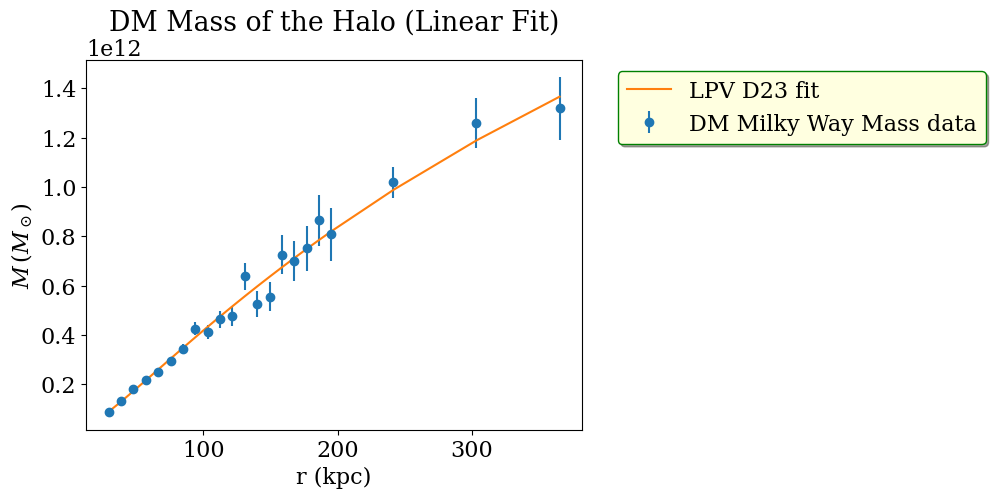

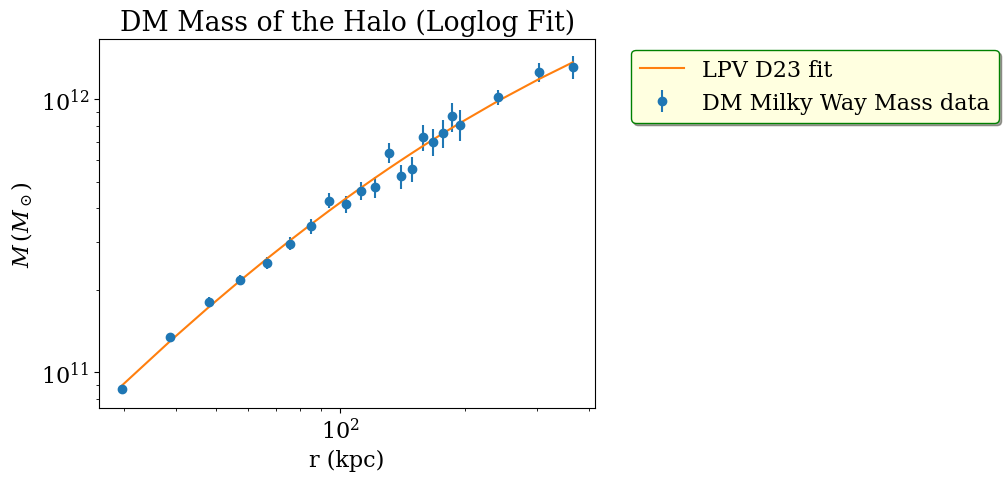

In [128]:
# plotting the data with the D23 fit
plt.figure()
plt.errorbar(r_lpv_restricted, M_dm_restricted, yerr=M_err_dm_restricted, fmt='o', label='DM Milky Way Mass data')
plt.plot(r_lpv_restricted, M_dm_fit_d23, '-', label='LPV D23 fit')
plt.xlabel('r (kpc)')
plt.ylabel(r'$M \, (M_\odot)$')
plt.title('DM Mass of the Halo (Linear Fit)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True)
plt.show()
plt.figure()
plt.errorbar(r_lpv_restricted, M_dm_restricted, yerr=M_err_dm_restricted, fmt='o', label='DM Milky Way Mass data')
plt.plot(r_lpv_restricted, M_dm_fit_d23, '-', label='LPV D23 fit')
plt.xlabel('r (kpc)')
plt.ylabel(r'$M \, (M_\odot)$')
plt.title('DM Mass of the Halo (Loglog Fit)')
plt.loglog()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True)
plt.show()


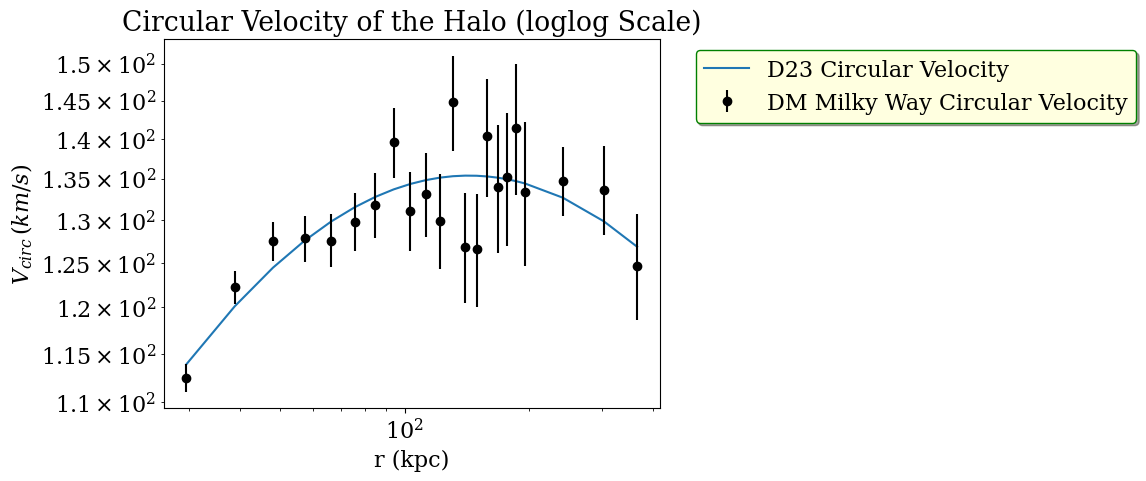

In [143]:
#obtain the circular velocity and plot it
v_mw_dm_restricted = v_mw_dm[r_lpv < 400]
v_mw_dm_err_restricted = v_mw_dm_err[r_lpv < 400]
r_lpv_restricted = r_lpv[r_lpv < 400]
v_circ_d23 = pd23.circularVelocity(r_lpv_restricted/h) # km/s
plt.figure()
plt.plot(r_lpv_restricted, v_circ, label='D23 Circular Velocity')
plt.errorbar(r_lpv_restricted, v_mw_dm_restricted, yerr=v_mw_dm_err_restricted, fmt='o', color='black', label='DM Milky Way Circular Velocity')
plt.xlabel('r (kpc)')
plt.loglog()
plt.ylabel(r'$V_{circ} \, (km/s)$')
plt.title('Circular Velocity of the Halo (loglog Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);
plt.show()



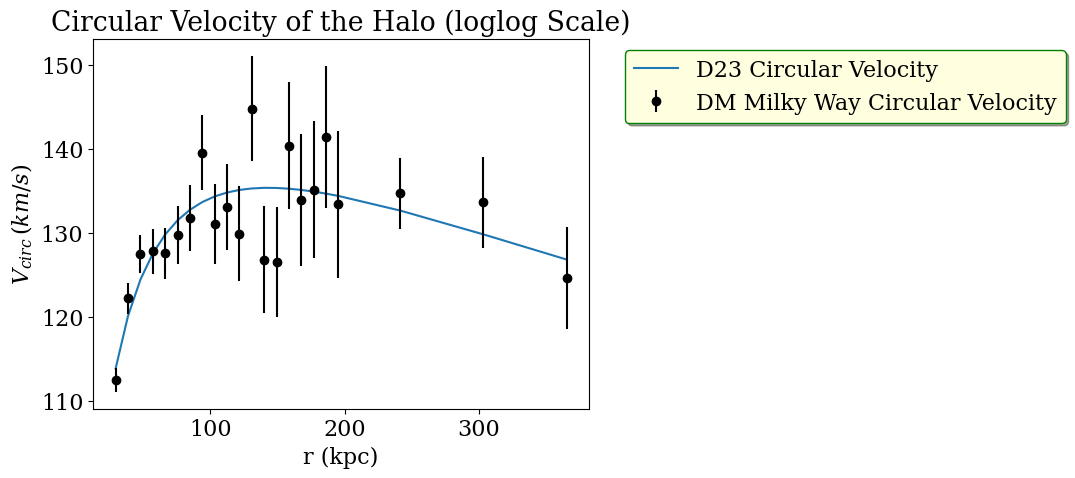

In [144]:
#obtain the circular velocity and plot it
v_mw_dm_restricted = v_mw_dm[r_lpv < 400]
v_mw_dm_err_restricted = v_mw_dm_err[r_lpv < 400]
r_lpv_restricted = r_lpv[r_lpv < 400]
v_circ_23 = pd23.circularVelocity(r_lpv_restricted/h) # km/s
plt.figure()
plt.plot(r_lpv_restricted, v_circ, label='D23 Circular Velocity')
plt.errorbar(r_lpv_restricted, v_mw_dm_restricted, yerr=v_mw_dm_err_restricted, fmt='o', color='black', label='DM Milky Way Circular Velocity')
plt.xlabel('r (kpc)')
plt.ylabel(r'$V_{circ} \, (km/s)$')
plt.title('Circular Velocity of the Halo (loglog Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);
plt.show()


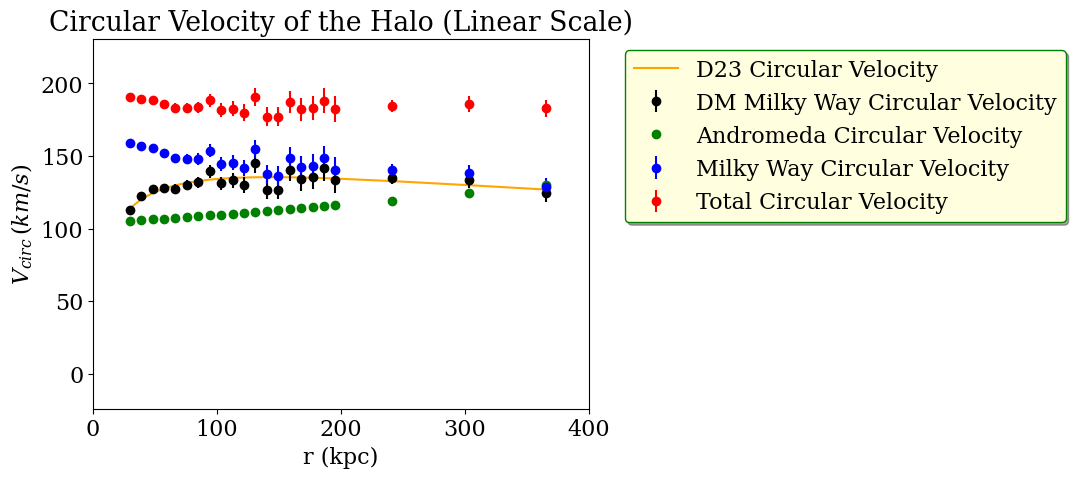

In [145]:
# obtain the circular velocity and plot it
v_mw_dm_restricted = v_mw_dm[r_lpv < 400]
v_mw_dm_err_restricted = v_mw_dm_err[r_lpv < 400]
r_lpv_restricted = r_lpv[r_lpv < 400]

v_circ_23 = pd23.circularVelocity(r_lpv_restricted/h) # km/s
plt.figure()
plt.plot(r_lpv_restricted, v_circ, label='D23 Circular Velocity', color='orange')
plt.errorbar(r_lpv_restricted, v_mw_dm_restricted, yerr=v_mw_dm_err_restricted, fmt='o', color='black', label='DM Milky Way Circular Velocity')
plt.errorbar(r_lpv, v_andro, fmt='o', color='green', label='Andromeda Circular Velocity')
plt.errorbar(r_lpv, v_mw, yerr=v_mw_err, fmt='o', color='blue', label='Milky Way Circular Velocity')
plt.errorbar(r_lpv, v_lpv, yerr=v_lpv_err, fmt='o', color='red', label='Total Circular Velocity')
plt.xlabel('r (kpc)')
plt.xlim(0, 400)
plt.ylabel(r'$V_{circ} \, (km/s)$')
plt.title('Circular Velocity of the Halo (Linear Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);
plt.show()


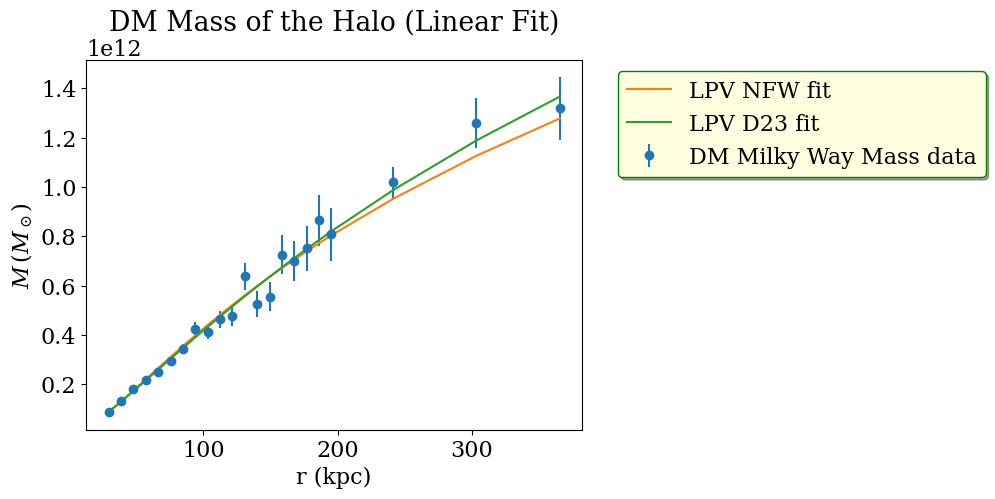

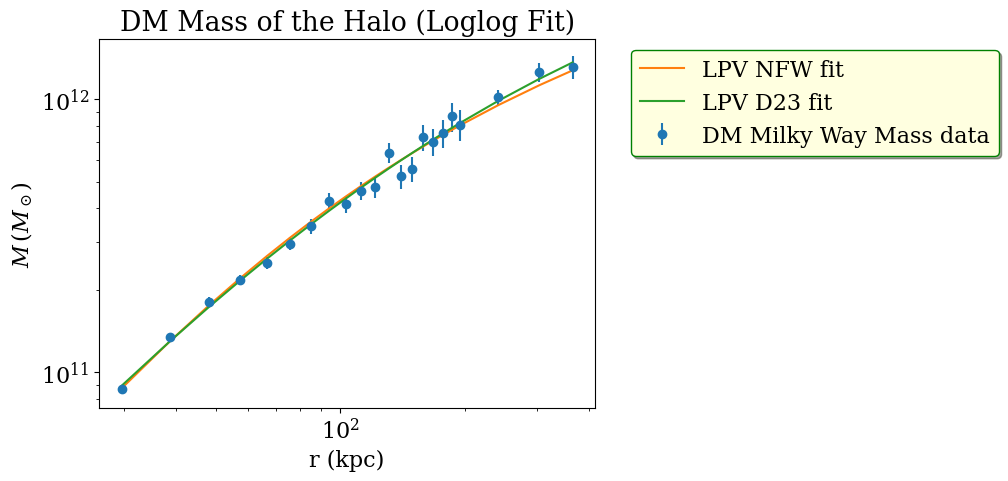

In [134]:
# Comparison of NFW and Diemer23
plt.figure()
plt.errorbar(r_lpv_restricted, M_dm_restricted, yerr=M_err_dm_restricted, fmt='o', label='DM Milky Way Mass data')
plt.plot(r_lpv_restricted, M_dm_fit_nfw, '-', label='LPV NFW fit')
plt.plot(r_lpv_restricted, M_dm_fit_d23, '-', label='LPV D23 fit')
plt.xlabel('r (kpc)')
plt.ylabel(r'$M \, (M_\odot)$')
plt.title('DM Mass of the Halo (Linear Fit)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True)
plt.show()
plt.figure()
plt.errorbar(r_lpv_restricted, M_dm_restricted, yerr=M_err_dm_restricted, fmt='o', label='DM Milky Way Mass data')
plt.plot(r_lpv_restricted, M_dm_fit_nfw, '-', label='LPV NFW fit')
plt.plot(r_lpv_restricted, M_dm_fit_d23, '-', label='LPV D23 fit')
plt.xlabel('r (kpc)')
plt.ylabel(r'$M \, (M_\odot)$')
plt.title('DM Mass of the Halo (Loglog Fit)')
plt.loglog()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True)
plt.show()

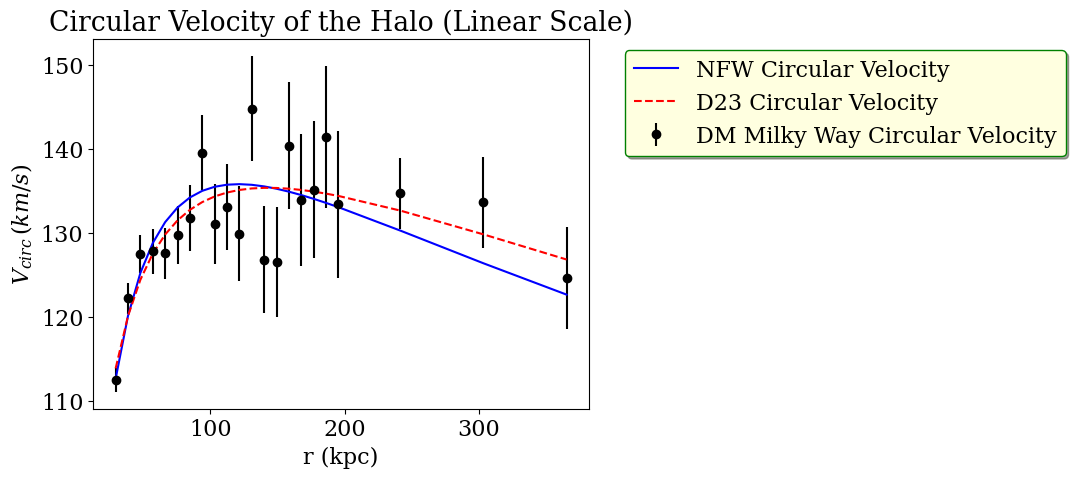

In [146]:
# Comparison of RC fit for the two profiles
v_circ_nfw = pnfw.circularVelocity(r_lpv_restricted/h) # km/s
v_circ_d23 = pd23.circularVelocity(r_lpv_restricted/h) # km/s
plt.figure()
plt.errorbar(r_lpv_restricted, v_mw_dm_restricted, yerr=v_mw_dm_err_restricted, fmt='o', color='black', label='DM Milky Way Circular Velocity')
plt.plot(r_lpv_restricted, v_circ_nfw, label='NFW Circular Velocity', color='blue')
plt.plot(r_lpv_restricted, v_circ_d23, label='D23 Circular Velocity', color='red', linestyle='--')

plt.xlabel('r (kpc)')
plt.ylabel(r'$V_{circ} \, (km/s)$')
plt.title('Circular Velocity of the Halo (Linear Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);
plt.show()

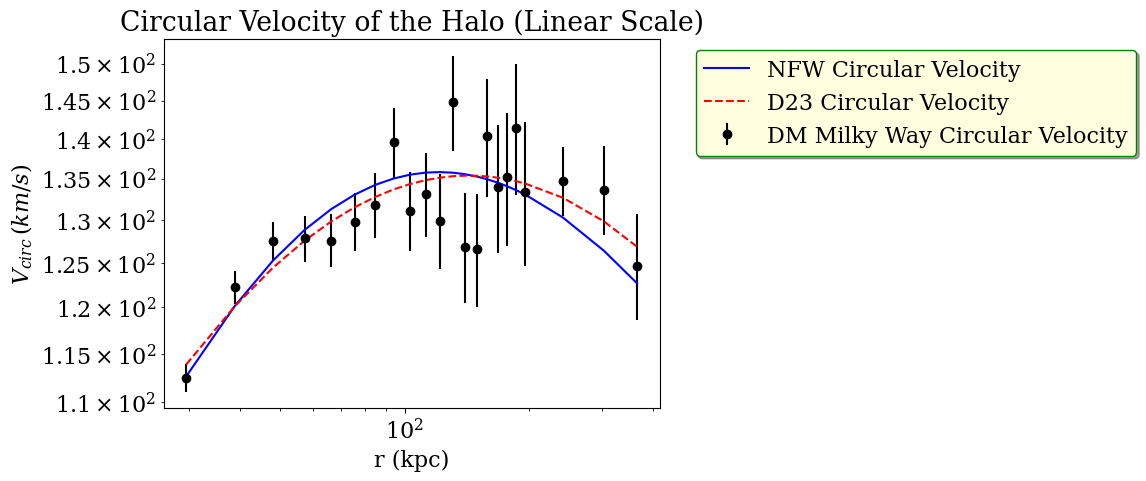

In [147]:
# Comparison of RC fit for the two profiles
v_circ_nfw = pnfw.circularVelocity(r_lpv_restricted/h) # km/s
v_circ_d23 = pd23.circularVelocity(r_lpv_restricted/h) # km/s
plt.figure()
plt.errorbar(r_lpv_restricted, v_mw_dm_restricted, yerr=v_mw_dm_err_restricted, fmt='o', color='black', label='DM Milky Way Circular Velocity')
plt.plot(r_lpv_restricted, v_circ_nfw, label='NFW Circular Velocity', color='blue')
plt.plot(r_lpv_restricted, v_circ_d23, label='D23 Circular Velocity', color='red', linestyle='--')

plt.xlabel('r (kpc)')
plt.ylabel(r'$V_{circ} \, (km/s)$')
plt.loglog()
plt.title('Circular Velocity of the Halo (Linear Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);
plt.show()

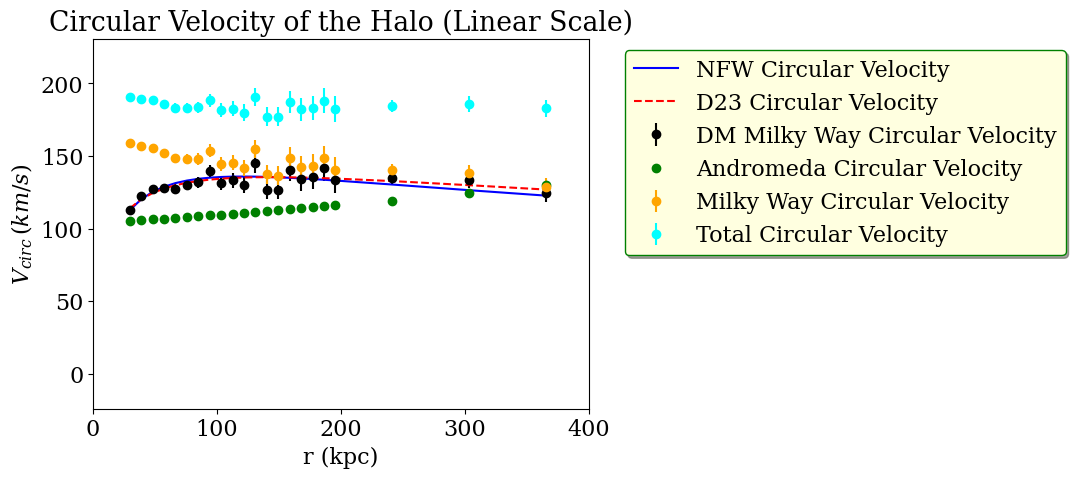

In [152]:
# comparison of the two profiles for velocity data
plt.figure()
plt.errorbar(r_lpv_restricted, v_mw_dm_restricted, yerr=v_mw_dm_err_restricted, fmt='o', color='black', label='DM Milky Way Circular Velocity')
plt.plot(r_lpv_restricted, v_circ_nfw, label='NFW Circular Velocity', color='blue')
plt.plot(r_lpv_restricted, v_circ_d23, label='D23 Circular Velocity', color='red', linestyle='--')
plt.errorbar(r_lpv, v_andro, fmt='o', color='green', label='Andromeda Circular Velocity')
plt.errorbar(r_lpv, v_mw, yerr=v_mw_err, fmt='o', color='orange', label='Milky Way Circular Velocity')
plt.errorbar(r_lpv, v_lpv, yerr=v_lpv_err, fmt='o', color='cyan', label='Total Circular Velocity')
plt.xlabel('r (kpc)')
plt.xlim(0, 400)
plt.ylabel(r'$V_{circ} \, (km/s)$')
plt.title('Circular Velocity of the Halo (Linear Scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);
plt.show()

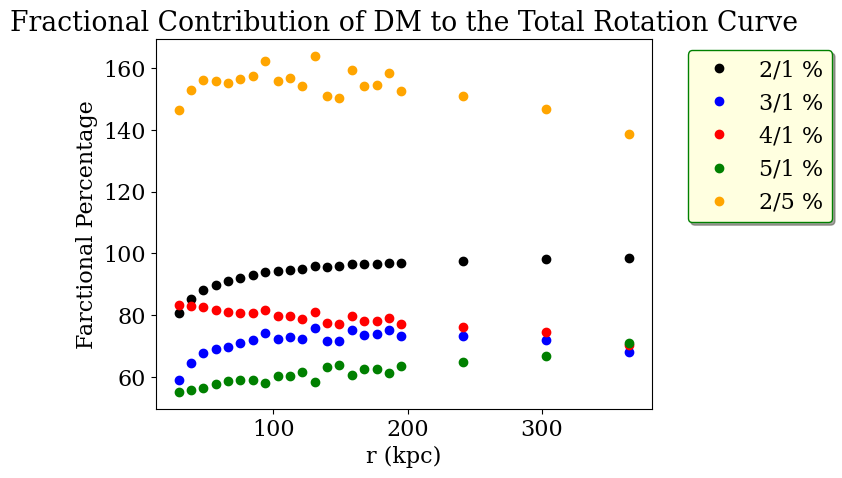

In [156]:
#fractional plots where the radial bins are the same

# Calculate the DM contribution to the total rotation curve
v_dm = np.sqrt(v_lpv**2 - Vbary(r_lpv)**2)
v_dm_err = v_lpv_err
v_dm_restricted = v_dm[r_lpv < 400]

point2_point1 = v_dm_restricted/(v_lpv[r_lpv < 400]) * 100
point3_point1 = v_mw_dm_restricted/(v_lpv[r_lpv < 400]) * 100
point4_point1 = v_mw[r_lpv < 400]/(v_lpv[r_lpv < 400]) * 100
point5_point1 = v_andro[r_lpv < 400]/(v_lpv[r_lpv < 400]) * 100
point2_point5 = v_dm_restricted/(v_andro[r_lpv < 400]) * 100

#overplotting the data
plt.figure()
plt.errorbar(r_lpv_restricted, point2_point1, fmt='o', color='black', label='2/1 %')
plt.errorbar(r_lpv_restricted, point3_point1, fmt='o', color='blue', label='3/1 %')
plt.errorbar(r_lpv_restricted, point4_point1, fmt='o', color='red', label='4/1 %')
plt.errorbar(r_lpv_restricted, point5_point1, fmt='o', color='green', label='5/1 %')
plt.errorbar(r_lpv_restricted, point2_point5, fmt='o', color='orange', label='2/5 %')
plt.xlabel('r (kpc)')
plt.ylabel(r'Farctional Percentage')
plt.title('Fractional Contribution of DM to the Total Rotation Curve')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True);
plt.show()

